In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
reduced = pd.read_csv("../reduced.csv")
reduced = reduced.drop(columns = reduced.columns[0])

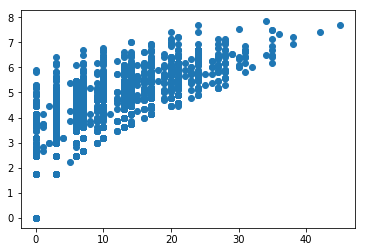

In [6]:
plt.scatter(reduced.tmhalfsc, reduced.scores)

In [7]:
base_X = reduced.drop(columns="scores")
base_y = reduced["scores"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(base_X, base_y, test_size=0.25)

In [9]:
base_lm = LinearRegression()
base_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
base_lm_r2 = base_lm.score(X_test, y_test)
base_lm_pred = base_lm.predict(X_test)

In [11]:
def rmse(pred, y):
    n = len(y)
    RMSE = sqrt(sum((pred - y)**2) / n)
    return RMSE

In [12]:
base_lm_RMSE = rmse(base_lm_pred, y_test)

In [13]:
print(f"Baseline Linear Regression RMSE: {base_lm_RMSE:.3f}")
print(f"Baseline Linear Regression R^2: {base_lm_r2:.3f}")

Baseline Linear Regression RMSE: 0.793
Baseline Linear Regression R^2: 0.566


In [14]:
"""Hand Picked Variables from R:
predscores+tmhalfsc+patt+ypa+ratt+ypr+sackyds"""
manual = reduced[["scores", "predscores", "tmhalfsc", "patt", "ypa", "ratt", "ypr", "sackyds"]]

In [15]:
man_X = manual.drop(columns="scores")
man_y = manual["scores"]

In [16]:
man_X_train, man_X_test, man_y_train, man_y_test = train_test_split(man_X, man_y, test_size=0.25)

In [17]:
man_lm = LinearRegression(normalize=True)
man_lm.fit(man_X_train, man_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
man_lm_pred = man_lm.predict(man_X_test)
man_lm_RMSE = rmse(man_lm_pred, man_y_test)
man_lm_r2 = man_lm.score(man_X_test, man_y_test)

In [19]:
print(f"Manual Linear Regression RMSE: {man_lm_RMSE:.4f}")
print(f"Manual Linear Regression R^2: {man_lm_r2:.4f}")

Manual Linear Regression RMSE: 0.8031
Manual Linear Regression R^2: 0.5482


In [20]:
bag_lm = LinearRegression()
bag = BaggingRegressor(bag_lm, bootstrap=True, n_estimators=10)

In [21]:
bag.fit(man_X_train, man_y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [22]:
bag_pred = bag.predict(man_X_test)
bag_RMSE = rmse(bag_pred, man_y_test)
bag_r2 = bag.score(man_X_test, man_y_test)

In [23]:
bag_RMSE

0.8036229162653291

In [24]:
bag_r2

0.5476084197748438

## Cross Validation Visualization

In [25]:
reset -fs

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
reduced = pd.read_csv("../reduced.csv")
reduced = reduced.drop(columns = reduced.columns[0])

In [28]:
X = reduced.drop(columns="scores")
y = reduced["scores"]

In [29]:
lr = LinearRegression()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

In [31]:
train_size, train_scores, valid_scores = learning_curve(estimator=lr, X=X_train, y=y_train, 
                                                        train_sizes=np.arange(0.75, 1.0, 0.01), cv=10)

In [32]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

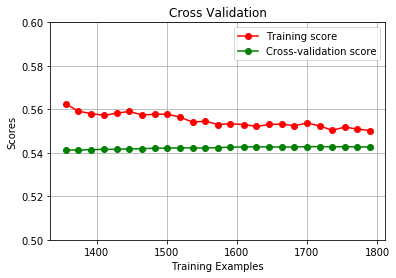

In [33]:
plt.figure()
plt.title("Cross Validation")
plt.xlabel("Training Examples")
plt.ylabel("Scores")
plt.grid()
plt.plot(train_size, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_size, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.ylim(0.5, 0.6)
plot = plt.legend(loc="best")

## Transformation of tmhalfsc

In [34]:
reset -fs

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
reduced = pd.read_csv("../reduced.csv")
reduced = reduced.drop(columns = reduced.columns[0])

In [38]:
X = reduced.drop(columns="scores")
y = reduced["scores"]

In [39]:
def get_log(col):
    log_col = []
    for i in range(len(col)):
        if col[i] != 0:
            log_col.append(np.log(col[i]))
        else:
            log_col.append(col[i])
    return log_col

In [40]:
log_tmhalf = get_log(X.tmhalfsc)
log_pred = get_log(X.predscores)
log_opp = get_log(X.opphalfsc)
log_y = get_log(y)
sqrt_tmhalf = np.sqrt(X.tmhalfsc)
sqrt_pred = np.sqrt(X.predscores)
sqrt_opp = np.sqrt(X.opphalfsc)

In [41]:
# X = X.drop(columns=["tmhalfsc", "predscores", "opphalfsc"])
X = X.drop(columns=["tmhalfsc"])
X["tmhalfsc"] = sqrt_tmhalf
# X["predscores"] = sqrt_pred
# X["opphalfsc"] = sqrt_opp

In [42]:
def rmse(pred, y):
    n = len(y)
    RMSE = np.sqrt(sum((pred - y)**2) / n)
    return RMSE

In [43]:
rmse_scores = []
r2_scores = []
rand_state = np.random.randint(0, 10000, 1000)
for i in rand_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr = LinearRegression().fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2_scores.append(lr.score(X_test, y_test))
    rmse_scores.append(rmse(pred, y_test))

In [44]:
scores = list(zip(rand_state, rmse_scores, r2_scores))

In [45]:
best_state = sorted(scores, key=lambda x: x[1])[0]
print("Models sorted on RMSE ascending:")
print(f"Random State: {best_state[0]}")
print(f"RMSE: {best_state[1]:.4f}")
print(f"R^2: {best_state[2]:.4f}")

Models sorted on RMSE ascending:
Random State: 7245
RMSE: 0.7509
R^2: 0.5782


In [46]:
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Median RMSE: {np.median(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")
print(f"Median R^2: {np.median(r2_scores)}")

Mean RMSE: 0.8244590061835421
Median RMSE: 0.8245648434535324
Mean R^2: 0.5544433784131845
Median R^2: 0.5555201599574371


In [47]:
man_X = X[["predscores", "tmhalfsc", "patt", "ypa", "ratt", "ypr", "sackyds"]]
man_y = y

In [48]:
man_rmse_scores = []
man_r2_scores = []
for i in rand_state:
    man_X_train, man_X_test, man_y_train, man_y_test = train_test_split(man_X, man_y, test_size=0.25, random_state=i)
    man_lr = LinearRegression(fit_intercept=False, normalize=True).fit(man_X_train, man_y_train)
    man_pred = man_lr.predict(man_X_test)
    man_r2_scores.append(man_lr.score(man_X_test, man_y_test))
    man_rmse_scores.append(rmse(man_pred, man_y_test))

In [49]:
man_scores = list(zip(rand_state, man_rmse_scores, man_r2_scores))

In [50]:
best_state = sorted(man_scores, key=lambda x: x[1])[0]
print("Manual models sorted on RMSE ascending:")
print(f"Random State: {best_state[0]}")
print(f"Manual RMSE: {best_state[1]:.4f}")
print(f"Manual R^2: {best_state[2]:.4f}")

Manual models sorted on RMSE ascending:
Random State: 1396
Manual RMSE: 0.7639
Manual R^2: 0.5749


In [51]:
print(f"Manual mean RMSE: {np.mean(man_rmse_scores)}")
print(f"Manual median RMSE: {np.median(man_rmse_scores)}")
print(f"Manual mean R^2: {np.mean(man_r2_scores)}")
print(f"Manual median R^2: {np.median(man_r2_scores)}")

Manual mean RMSE: 0.8341627333450019
Manual median RMSE: 0.8338744820619431
Manual mean R^2: 0.5437937641430297
Manual median R^2: 0.5449107051337834
